# Sumarização de textos com o Algoritmo de Luhn

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

## Preparação do texto de exemplo

In [1]:
# Importando as bibliotecas para o algoritmo
import re
import nltk
import string
import heapq

In [2]:
# Baixando a parte de tokenização do nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Baixando a parte das stopwords do nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Texto de exemplo
texto_original = """A inteligência artificial é a inteligência similar à humana máquinas.
                    Definem como o estudo de agente artificial com inteligência.
                    Ciência e engenharia de produzir máquinas com inteligência.
                    Resolver problemas e possuir inteligência.
                    Relacionada ao comportamento inteligente.
                    Construção de máquinas para raciocinar.
                    Aprender com os erros e acertos.
                    Inteligência artificial é raciocinar nas situações do cotidiano."""
# Romovendo os tabs e mais que um espaço em branco
texto_original = re.sub(r'\s+', ' ', texto_original)
texto_original

'A inteligência artificial é a inteligência similar à humana máquinas. Definem como o estudo de agente artificial com inteligência. Ciência e engenharia de produzir máquinas com inteligência. Resolver problemas e possuir inteligência. Relacionada ao comportamento inteligente. Construção de máquinas para raciocinar. Aprender com os erros e acertos. Inteligência artificial é raciocinar nas situações do cotidiano.'

In [5]:
# Mostrando as stopwords da língua portuguesa
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [88]:
# Adicionando mais algumas palavras nas stopwords, se necessário
stopwords.append('ser')
stopwords.append('além')
stopwords.append('onde')

print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [7]:
# Função para formatar o texto, onde é tokenizado, removido pontuações e dígitos
def preprocessamento(texto):
  texto_formatado = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(texto_formatado):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

## Função para calcular a nota das sentenças

In [8]:
# Exemplo de como funciona a função index de um vetor
teste = ['a', 'b', 'c']
teste.index('b')

1

In [9]:
# Função para dar notas para as sentenças mais relevantes
def calcula_nota_sentenca(sentencas, palavras_importantes, distancia):
  notas = []
  indice_sentenca = 0

  # Passa por todas as sentenças tokenizando as palavras em minúsculo, o resultado é um array de palavras com cada sentença por vez
  for sentenca in [nltk.word_tokenize(s.lower()) for s in sentencas]:
    # O indices onde estão possicionados cada palavras dentro da sentença
    indice_palavra = []

    # Percorre cada palavra importante e tenta adicionar o indice dela em indice_palavra
    for palavra in palavras_importantes:
      # Se a palavra das palavras importantes está no array de sentença, então adiciona o indice dela no array de infices de palavras
      if palavra in sentenca:
        indice_palavra.append(sentenca.index(palavra))
      #try:
      #  indice_palavra.append(sentenca.index(palavra))
      #except ValueError:
      #  pass

    # Ordena os indices
    indice_palavra.sort()

    # Se o array de indices estiver vázio volte no inicio do for
    if len(indice_palavra) == 0:
      indice_sentenca += 1 # senão sempre segue a ordem do indice e as sentenças vázias (sem palavras importantes) são passadas
      continue

    # arrays para o grupo de lavras
    lista_grupos = []
    grupo = [indice_palavra[0]]
    qtd_palavras_importantes_grupo = []

    # Parte do algoritmo de Luhn que verifica as distâncias entre as palavras em uma sentença e separa em grupos
    for i in range(1, len(indice_palavra)):
      if indice_palavra[i] - indice_palavra[i - 1] < distancia:
        grupo.append(indice_palavra[i])
      else:
        lista_grupos.append(grupo)
        qtd_palavras_importantes_grupo.append(len(grupo))
        grupo = [indice_palavra[i]]

    # Adiciona o último grupo na lista de grupos e tamanho
    lista_grupos.append(grupo)
    qtd_palavras_importantes_grupo.append(len(grupo))

    # Passa por cada grupo e da a nota segundo o algoritmo (importante^2/total)
    nota_maxima_grupo = 0
    for indice, grupo in enumerate(lista_grupos):
      # ORIGINAL ????????????????????????????????
      # palavras_importantes_no_grupo = len(grupo)
      # total_palavras_no_grupo = grupo[-1] - grupo[0] + 1

      # nota = qtd_palavras_importantes_grupo^2 / total_palavras_grupo
      nota = 1.0 * qtd_palavras_importantes_grupo[indice]**2 / len(grupo)

      # A maior nota de cada grupo é a nota da sentença
      if nota > nota_maxima_grupo:
        nota_maxima_grupo = nota


    notas.append((nota_maxima_grupo, indice_sentenca))
    indice_sentenca += 1

  return notas

## Função para sumarizar os textos

In [13]:
def sumarizar(texto, top_n_palavras, distancia, quantidade_sentencas):
  # Separa os tokens em sentenças
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]

  # Formatando as sentenças utilizando a função de processamento criada anteriormente
  sentencas_formatadas = [preprocessamento(sentenca_original) for sentenca_original in sentencas_originais]

  # Separa os tokens em palavras
  palavras = [palavra for sentenca in sentencas_formatadas for palavra in nltk.word_tokenize(sentenca)]

  # Cálcula a frequência das palavras que aparecem
  frequencia = nltk.FreqDist(palavras)

  # Pega as palavras ([0] = chave) com mais frequências utilizadas
  top_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]

  # Chama a função para calcular as notas das sentenças
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_palavras, distancia)

  # Faz a seleção das melhores notas (por indice)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)

  # Buscando o texto das sentenças
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]

  return sentencas_originais, melhores_sentencas, notas_sentencas

In [15]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(texto_original, 5, 3, 3)

In [14]:
sentencas_originais

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Definem como o estudo de agente artificial com inteligência.',
 'Ciência e engenharia de produzir máquinas com inteligência.',
 'Resolver problemas e possuir inteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de máquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.']

In [16]:
melhores_sentencas

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.',
 'Construção de máquinas para raciocinar.']

In [17]:
notas_sentencas

[(4.0, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 5), (3.0, 7)]

## Visualização do resumo

In [18]:
# Função para destacar o texto importante do original
def visualiza_resumo(titulo, lista_sentencas, melhores_sentencas):
  from IPython.core.display import HTML
  texto = ''

  display(HTML(f'<h1>Resumo do texto - {titulo}</h1>'))
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i
  display(HTML(f""" {texto} """))

In [19]:
visualiza_resumo('Teste', sentencas_originais, melhores_sentencas)

## Extração de texto da internet

In [20]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=aa5753e7697075722894c40fc6ee2a959c318872565ce0db4f08f4f690b471fc
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [21]:
# Importando a biblioteca para extração de texto na web
from goose3 import Goose

In [26]:
# Criando o objeto da classe e extraindo o texto da internet
g = Goose()
url = 'https://iaexpert.academy/2020/11/09/ia-preve-resultado-das-eleicoes-americanas/'
artigo = g.extract(url)

In [25]:
artigo.cleaned_text

'Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton. Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos. Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados. Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.\n\nO modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais. O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito. No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.\n\nO Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano passado. Desta vez, o mode

In [27]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(artigo.cleaned_text, 300, 10, 5)

In [28]:
sentencas_originais

['Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton.',
 'Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos.',
 'Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados.',
 'Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.',
 'O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito.',
 'No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.',
 'O Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano pas

In [29]:
melhores_sentencas

['A participação em redes sociais costuma ser maior nas cidades grandes, que de fato têm preferência por um dos candidatos, e o modelo deve ser corrigido para levar em consideração também a opinião das pessoas que não são ativas neste ambiente virtual.',
 'O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O trabalho não depende apenas da coleta dos dados, mas também de um tratamento estatístico adequado para levar em consideração duas variáveis externas: o viés de amostragem e a taxa de comparecimento.',
 'Quando seu modelo foi usado para predizer os resultados da eleição corrente usando dados brutos, Joe Biden apareceu como vencedor com larga vantagem.',
 'Após aplicar os mecanismos de correção para os dois vieses identificados, a vantagem diminuiu, mas Biden ainda é indicado como favorito.']

In [30]:
notas_sentencas

[(9.0, 0),
 (10.0, 1),
 (9.0, 2),
 (8.0, 3),
 (21.0, 4),
 (10.0, 5),
 (8.0, 6),
 (12.0, 7),
 (10.0, 8),
 (17.0, 9),
 (10.0, 10),
 (22.0, 11),
 (13.0, 12),
 (10.0, 13),
 (12.0, 14),
 (12.0, 15),
 (15.0, 16),
 (13.0, 17),
 (8.0, 18)]

In [31]:
visualiza_resumo(artigo.title, sentencas_originais, melhores_sentencas)

## Leitura de artigos de feed de notícias (RSS)

In [32]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=91ff95970182b517b3321e52c0be9d839bf9ec74b52bf23ecb797f600bb04305
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [34]:
# Baixando a biblioteca para ler textos de feed de notícias
import feedparser

In [35]:
# Outras bibliotecas para formatar e trabalhar com arquivos
from bs4 import BeautifulSoup
import os
import json

In [36]:
# Lendo o feed do links
url = 'https://iaexpert.academy/feed/'
feed = feedparser.parse(url)

In [38]:
# O contrúdo
feed.entries

[{'title': 'Novo método apresenta resultados inéditos para reconstrução de imagens mentais a partir de atividade cerebral',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://iaexpert.academy/feed/',
   'value': 'Novo método apresenta resultados inéditos para reconstrução de imagens mentais a partir de atividade cerebral'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://iaexpert.academy/2023/12/20/novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-atividade-cerebral/?utm_source=rss&utm_medium=rss&utm_campaign=novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-atividade-cerebral'}],
  'link': 'https://iaexpert.academy/2023/12/20/novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-atividade-cerebral/?utm_source=rss&utm_medium=rss&utm_campaign=novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-

In [43]:
# Acessando algumas informações no conteúdo do feed
for e in feed.entries:
  print(e.title) # Título da notícia
  print(e.links[0].href) # Links nessa notícia
  print(e.content[0].value) # O corpo do texto de dessa notícia

Novo método apresenta resultados inéditos para reconstrução de imagens mentais a partir de atividade cerebral
https://iaexpert.academy/2023/12/20/novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-atividade-cerebral/?utm_source=rss&utm_medium=rss&utm_campaign=novo-metodo-apresenta-resultados-ineditos-para-reconstrucao-imagens-mentais-a-partir-atividade-cerebral
<p>No dinâmico cruzamento entre inteligência artificial e neurociência, uma das áreas mais fascinantes e desafiadoras corresponde à geração de informação estruturada a partir da atividade cerebral. Um <a href="https://www.sciencedirect.com/science/article/pii/S0893608023006470">estudo</a> publicado por pesquisadores associados à Universidade de Osaka, no Japão, apresenta resultados inéditos para a reconstrução de imagens mentais, vistas ou imaginadas, em representações visuais, literalmente traduzindo pensamentos.</p>



<p>O estudo utiliza a decodificação neural, uma técnica que traduz a ativid

In [42]:
# Um em específico
e.content[0].value

'<p>A previsão de séries temporais desempenha um papel crucial em várias aplicações do mundo real, que vão desde a previsão da demanda até a análise da propagação de pandemias. O campo da previsão de séries temporais multivariadas testemunhou duas categorias principais de modelos: univariados e multivariados. Modelos univariados focam na captura de tendências e padrões sazonais em séries temporais de variável única, enquanto que modelos multivariados, na forma de redes neurais, estendem suas capacidades para processar informações cruzadas entre variáveis diferentes, fornecendo insights sobre as interações entre essas variáveis. Comparações entre as duas abordagens levantaram um paradoxo intrigante: modelos multivariados avançados frequentemente têm desempenho inferior a modelos lineares univariados mais simples em benchmarks de previsão de longo prazo, levantando questões sobre a importância da informação cruzada na previsão de séries temporais.</p>\n\n\n\n<p>Em resposta a esse desafio

In [46]:
# Função para facilitar a visualização do texto
def limpa_html(texto):
  if texto == '':
    return ''
  return BeautifulSoup(texto, 'html5lib').get_text()

In [47]:
limpa_html(e.content[0].value)

'A previsão de séries temporais desempenha um papel crucial em várias aplicações do mundo real, que vão desde a previsão da demanda até a análise da propagação de pandemias. O campo da previsão de séries temporais multivariadas testemunhou duas categorias principais de modelos: univariados e multivariados. Modelos univariados focam na captura de tendências e padrões sazonais em séries temporais de variável única, enquanto que modelos multivariados, na forma de redes neurais, estendem suas capacidades para processar informações cruzadas entre variáveis diferentes, fornecendo insights sobre as interações entre essas variáveis. Comparações entre as duas abordagens levantaram um paradoxo intrigante: modelos multivariados avançados frequentemente têm desempenho inferior a modelos lineares univariados mais simples em benchmarks de previsão de longo prazo, levantando questões sobre a importância da informação cruzada na previsão de séries temporais.\n\n\n\nEm resposta a esse desafio, a equipe

In [48]:
# Salva o título e o corpo da notícia de vários elementos do feed
artigos = []
for e in feed.entries:
  artigos.append({'titulo': e.title, 'conteudo': limpa_html(e.content[0].value)})

In [49]:
artigos

[{'titulo': 'Novo método apresenta resultados inéditos para reconstrução de imagens mentais a partir de atividade cerebral',
  'conteudo': 'No dinâmico cruzamento entre inteligência artificial e neurociência, uma das áreas mais fascinantes e desafiadoras corresponde à geração de informação estruturada a partir da atividade cerebral. Um estudo publicado por pesquisadores associados à Universidade de Osaka, no Japão, apresenta resultados inéditos para a reconstrução de imagens mentais, vistas ou imaginadas, em representações visuais, literalmente traduzindo pensamentos.\n\n\n\nO estudo utiliza a decodificação neural, uma técnica que traduz a atividade cerebral medida por ressonância magnética funcional (fMRI) em representações visuais. Estudos anteriores reconstruíram com sucesso domínios específicos, como rostos humanos, letras escritas à mão e imagens binárias. O que diferencia este estudo é a incorporação de redes neurais profundas (DNNs) e modelos generativos, alcançando uma reconstr

In [50]:
# Salva o arquivo de feed em uma json
arquivo_gravar = os.path.join('feed_iaexpert.json')

# Cria um arquivo para gravar identado o valores do feed
with open(arquivo_gravar, 'w+') as arquivo:
  arquivo.write(json.dumps(artigos, indent=1))

In [ ]:
# Lendo o arquivo e mostrando o conteúdo
with open('/content/feed_iaexpert.json', encoding='utf-8') as arquivo:
  artigos_blog = json.load(arquivo)

artigos_blog

## Nuvem de palavras

In [83]:
# Passa por todos as notícias já processando o texto
conteudo_feed_formatado = ''
for artigo in artigos_blog:
  conteudo_feed_formatado += preprocessamento(artigo['conteudo'])

conteudo_feed_formatado

'dinâmico cruzamento inteligência artificial neurociência áreas fascinantes desafiadoras corresponde geração informação estruturada partir atividade cerebral estudo publicado pesquisadores associados universidade osaka japão apresenta resultados inéditos reconstrução imagens mentais vistas imaginadas representações visuais literalmente traduzindo pensamentos estudo utiliza decodificação neural técnica traduz atividade cerebral medida ressonância magnética funcional fmri representações visuais estudos anteriores reconstruíram sucesso domínios específicos rostos humanos letras escritas mão imagens binárias diferencia estudo incorporação redes neurais profundas dnns modelos generativos alcançando reconstrução imagem natural maior fidelidade enfrentar desafio externalizar imaginação mental pesquisadores ampliaram método anterior cenário estimação bayesiana contrário métodos tradicionais dependem fortemente informações visuais baixo nível abordagem bayesiana permite incorporação conheciment

In [84]:
# Importa a biblioteca para geração de núvem de palavras e a criação de gráficos
from wordcloud import WordCloud
import matplotlib.pyplot as plt

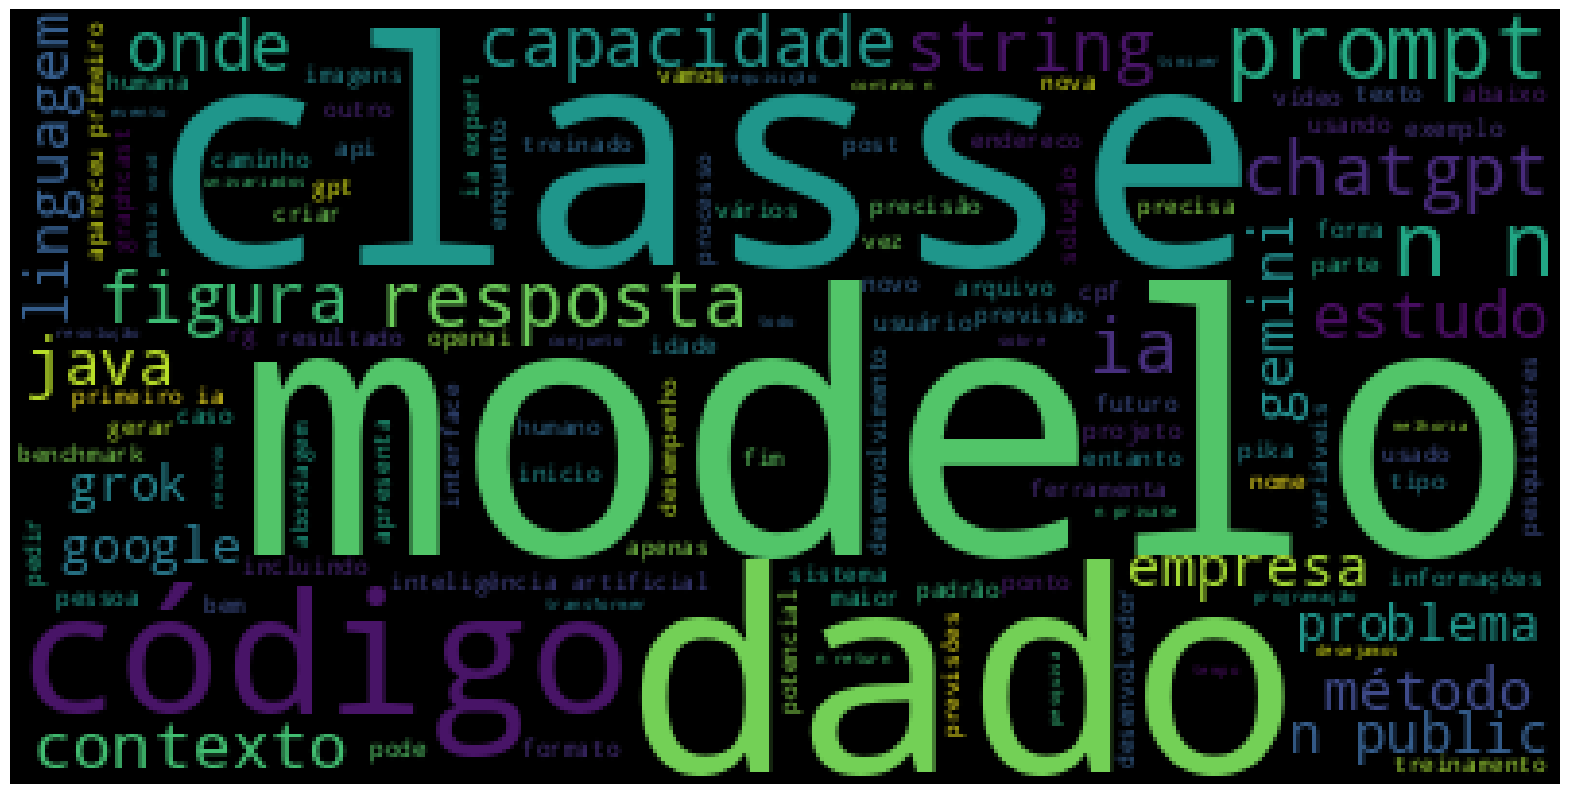

In [89]:
# Cria a imagem, desativa os eixos e cria núvem de palavras
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(conteudo_feed_formatado))

## Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [101]:
# Biblioteca de formatação de texto
import spacy
from spacy import displacy

In [98]:
# Carregando o pacote português
!python -m spacy download pt_core_news_sm

2023-12-26 19:13:46.912766: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 19:13:46.912853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 19:13:46.914699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 19:13:48.338297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [99]:
# Cria o objeto da classe em português
pln = spacy.load('pt_core_news_sm')
pln

In [100]:
# Salva o documento passando pelo processamento de lingagem natural
documento = pln(conteudo_feed_formatado)

In [102]:
# Renderizar o texto no objeto documento, com estilo estidade e indicando que está sendo usado o Jupyter notebooks
displacy.render(documento, style = 'ent', jupyter = True)

In [104]:
# Mostrando as entidades de localização que estão no texto
for entidade in documento.ents:
  if entidade.label_ == 'LOC':
    print(entidade.text, entidade.label_)

osaka japão LOC
la disney pixar gama LOC
\n\n LOC
\n\n LOC
\n\n LOC
\n\n LOC
hungria LOC
reino unido LOC
reino unido LOC
estados unidos LOC
estados unidos LOC


## Sumarização de artigos de feed de notícias

In [111]:
# Faz a sumarização de cada artigo do feed
for artigo in artigos_blog:
  sentencas_originais, melhores_sentencas, _ = sumarizar(artigo['conteudo'], 150, 10, 5)
  #visualiza_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)
  salva_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)

## Geração de arquivos HTML

In [110]:
# Função para salvar os textos formatados no formato HTML
def salva_resumo(titulo, lista_sentencas, melhores_sentencas):
  # Cabeçalho e parte inicial de uma arquivo HTML
  HTML_TEMPLATE = """
  <html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html> """

  # Colocando a parte do texto com as palavras importantes e o resto do conteúdo
  texto = ''
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += f'<mark>{i}</mark>'

  # Cria um arquivo com o conteúdo e palavras destacadas no corpo do HTML
  with open(os.path.join(titulo + '.html'), 'wb') as arquivo:
    html = HTML_TEMPLATE.format(titulo + ' - resumo', texto)
    arquivo.write(html.encode('utf-8'))

## Solução para o exercício - lematização

In [113]:
# Função que aplica a lematização no texto, como já visto em outras aulas, agora com spacy
def preprocessamento_lematizacao(texto):
  texto = texto.lower()
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  tokens = []
  for token in documento:
    tokens.append(token.lemma_)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

In [114]:
# Função para gerar o resumo do texto, agora com spacy
def sumarizar_lematizacao(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  sentencas_formatadas = [preprocessamento_lematizacao(sentenca_original) for sentenca_original in sentencas_originais]
  palavras = [palavra.lower() for sentenca in sentencas_formatadas for palavra in nltk.tokenize.word_tokenize(sentenca)]
  frequencia = nltk.FreqDist(palavras)
  top_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_palavras, distancia)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]

  return sentencas_originais, melhores_sentencas, notas_sentencas

In [117]:
# Contrúdo do primeiro artigo
artigos_blog[0]['conteudo']

'No dinâmico cruzamento entre inteligência artificial e neurociência, uma das áreas mais fascinantes e desafiadoras corresponde à geração de informação estruturada a partir da atividade cerebral. Um estudo publicado por pesquisadores associados à Universidade de Osaka, no Japão, apresenta resultados inéditos para a reconstrução de imagens mentais, vistas ou imaginadas, em representações visuais, literalmente traduzindo pensamentos.\n\n\n\nO estudo utiliza a decodificação neural, uma técnica que traduz a atividade cerebral medida por ressonância magnética funcional (fMRI) em representações visuais. Estudos anteriores reconstruíram com sucesso domínios específicos, como rostos humanos, letras escritas à mão e imagens binárias. O que diferencia este estudo é a incorporação de redes neurais profundas (DNNs) e modelos generativos, alcançando uma reconstrução de imagem natural de maior fidelidade.\n\n\n\nPara enfrentar o desafio de externalizar a imaginação mental, os pesquisadores ampliaram

In [118]:
# Aplicando a sumarização e vizualização original
sentencas_originais, melhores_sentencas, _ = sumarizar(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)

In [119]:
# Aplicando a sumarização e vizualização com spacy
sentencas_originais, melhores_sentencas, _ = sumarizar_lematizacao(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)